In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd 
import seaborn as sns
import statsmodels.api as sm
# imported libraries

In [3]:
# #clean per-capita-meat-type.csv
# import pandas as pd

# meat_df = pd.read_csv("datasets/original datasets/per-capita-meat-type.csv")
# codes_df = pd.read_csv("datasets/codes.csv")

# merged = pd.merge(meat_df, codes_df, left_on="Code", right_on="alpha-3", how="left")

# filtered = merged[merged["region"].isin(["Asia", "Europe"])]

# latest = filtered.sort_values("Year").groupby("Code").tail(1)

# meat_columns = [col for col in latest.columns if col.startswith("Meat")]
# latest["Total_Meat_kg_per_capita"] = latest[meat_columns].sum(axis=1)

# final_df = latest[["Entity", "Code", "Year", "region", "Total_Meat_kg_per_capita"] + meat_columns]

# final_df.to_csv("asia_europe_meat_consumption.csv", index=False)

# print(final_df["region"].value_counts())


In [4]:
# What we are going to do is use bootstrap sampling on the correlation between meat consumption and michlein star count.
# The rationale here is as such:
# Each COUNTRY has two VALUES. These VALUES are MEAT CONSUMPTION and MICHELIN COUNT (this can be either count of restaurants or count of stars.)
# We divide the two groups of countries into ASIAN and EUROPEAN.

# Why our research is relevant
---
There is always the debate in diet of meats versus vegetables, and we want to find out if they really are mutually exclusive. We also want to analyse the trends in meat and vegetable consumption over the years, and how they play off of each other.

In [ ]:
# # Import relevant datasets

# df_meats = pd.read_csv('datasets/per-capita-meat-type.csv')
# df_vegs = pd.read_csv('datasets/vegetable-consumption-per-capita.csv')

# # Replace long column names with ones that are more easy to access
# df_meats = df_meats.rename(columns={
#     'Meat, poultry | 00002734 || Food available for consumption | 0645pc || kilograms per year per capita': 'Poultry',
#     'Meat, beef and buffalo | 00002731 || Food available for consumption | 0645pc || kilograms per year per capita': 'BeefBuffalo',
#     'Meat, sheep and goat | 00002732 || Food available for consumption | 0645pc || kilograms per year per capita': 'SheepGoat',
#     'Meat, pig | 00002733 || Food available for consumption | 0645pc || kilograms per year per capita': 'Pig',
#     'Meat, Other | 00002735 || Food available for consumption | 0645pc || kilograms per year per capita': 'OtherMeat',
#     'Fish and seafood | 00002960 || Food available for consumption | 0645pc || kilograms per year per capita': 'Seafood'
# })

# # Find total consumption
# df_meats['totalconsumption'] = df_meats[['Poultry', 'BeefBuffalo', 'SheepGoat', 'Pig', 'OtherMeat', 'Seafood']].sum(axis=1, skipna=True)

# df_vegs = df_vegs.rename(columns={
#     'Vegetables | 00002918 || Food available for consumption | 0645pc || kilograms per year per capita': 'Vegetables'
# })

# # Compensate for muslim countries which may not have info for pigs.
# df_meats['Pig'] = df_meats['Pig'].fillna(0)

# print(df_meats.head())
# print(df_vegs.head())

        Entity Code  Year   Poultry  BeefBuffalo  SheepGoat  Pig  OtherMeat  \
0  Afghanistan  AFG  1961  0.612220     4.664536   7.949147  0.0   0.826012   
1  Afghanistan  AFG  1962  0.641587     4.870231   7.699047  0.0   0.855450   
2  Afghanistan  AFG  1963  0.641828     4.920679   7.867252  0.0   1.040539   
3  Afghanistan  AFG  1964  0.651754     4.893021   8.122609  0.0   0.982495   
4  Afghanistan  AFG  1965  0.681102     4.855283   8.406744  0.0   1.031383   

    Seafood  totalconsumption  
0  0.029153         14.081069  
1  0.029163         14.095478  
2  0.029174         14.499472  
3  0.029183         14.679062  
4  0.029190         15.003702  
        Entity Code  Year  Vegetables
0  Afghanistan  AFG  1961   35.712856
1  Afghanistan  AFG  1962   36.424660
2  Afghanistan  AFG  1963   37.799760
3  Afghanistan  AFG  1964   39.076070
4  Afghanistan  AFG  1965   39.727703


In [ ]:
# # EDA
# # What is the data we will need to be able to effectively answer the Q?
# # Filter by current data. Get some summary statistics.
# # Get histogram of meat and veg in 2022/2024.
# # Get ECDF of meat and veg in 2022/2024.

# # --------------------------------- Histogram -------------------------------- #
# # For meat
# # For all countries, so we should filter by entries that have a code.

# # Calculate total meat

# # Keep only rows for year 2022
# meat_2022 = df_meats[df_meats['Year'] == 2022]

# # Create a code filter for european countries
# eu_codes = [
#     'AUT', 'BEL', 'BGR', 'HRV', 'CYP', 'CZE', 'DNK', 'EST', 'FIN', 'FRA', 'DEU', 'GRC', 'HUN', 'IRL', 'ITA',
#     'LVA', 'LTU', 'LUX', 'MLT', 'NLD', 'POL', 'PRT', 'ROU', 'SVK', 'SVN', 'ESP', 'SWE',
#     'ALB', 'AND', 'ARM', 'BLR', 'BIH', 'FRO', 'GEO', 'GIB', 'ISL', 'IMN', 'XKX', 'LIE', 'MKD', 'MDA', 'MCO',
#     'MNE', 'NOR', 'RUS', 'SMR', 'SRB', 'CHE', 'TUR', 'UKR', 'GBR', 'VAT'
# ]


# # Create a code filter for asian countries
# ap_codes = [
#     'AFG', 'ARM', 'AZE', 'BHR', 'BGD', 'BTN', 'IOT', 'BRN',
#     'KHM', 'CHN', 'CCK', 'GEO', 'HKG', 'IND', 'IDN', 'IRN',
#     'IRQ', 'ISR', 'JPN', 'JOR', 'KAZ', 'KWT', 'KGZ', 'LAO',
#     'LBN', 'MAC', 'MYS', 'MDV', 'MNG', 'MMR', 'NPL', 'PRK',
#     'OMN', 'PAK', 'PSE', 'PHL', 'QAT', 'SAU', 'SGP', 'KOR',
#     'LKA', 'SYR', 'TWN', 'TJK', 'THA', 'TUR', 'TKM', 'ARE',
#     'UZB', 'VNM', 'YEM'
# ]

# # Filter
# meat_2022_eu = meat_2022[meat_2022['Code'].isin(eu_codes)]
# meat_2022_ap = meat_2022[meat_2022['Code'].isin(ap_codes)]

# # Do the same for vegetables
# veg_2022 = df_vegs[df_vegs['Year'] == 2022]

# veg_2022_eu = veg_2022[veg_2022['Code'].isin(eu_codes)]
# veg_2022_ap = veg_2022[veg_2022['Code'].isin(ap_codes)]

In [4]:
#print the heads and columns of monthly temp and gdp per capita datasets:
df = pd.read_csv('datasets/average-monthly-surface-temperature.csv')
print(df.head())
print(df.columns)
df = pd.read_csv('datasets/gdp-per-capita-worldbank.csv')
print(df.head())
print(df.columns)

        Entity Code  year         Day  Average surface temperature  \
0  Afghanistan  AFG  1940  1940-01-15                    -2.032494   
1  Afghanistan  AFG  1940  1940-02-15                    -0.733503   
2  Afghanistan  AFG  1940  1940-03-15                     1.999134   
3  Afghanistan  AFG  1940  1940-04-15                    10.199754   
4  Afghanistan  AFG  1940  1940-05-15                    17.942135   

   Average surface temperature.1  
0                      11.327695  
1                      11.327695  
2                      11.327695  
3                      11.327695  
4                      11.327695  
Index(['Entity', 'Code', 'year', 'Day', 'Average surface temperature',
       'Average surface temperature.1'],
      dtype='object')
        Entity Code  Year  \
0  Afghanistan  AFG  2000   
1  Afghanistan  AFG  2001   
2  Afghanistan  AFG  2002   
3  Afghanistan  AFG  2003   
4  Afghanistan  AFG  2004   

   GDP per capita, PPP (constant 2021 international $)  \
0 

In [7]:
import pandas as pd

# Load all datasets
meat_df = pd.read_csv("datasets/asia_europe_meat_consumption.csv")
fruit_df = pd.read_csv("datasets/fruit-consumption-per-capita.csv")
veg_df = pd.read_csv("datasets/vegetable-consumption-per-capita.csv")
temp_df = pd.read_csv("datasets/average-monthly-surface-temperature.csv")
gdp_df = pd.read_csv("datasets/gdp-per-capita-worldbank.csv")

# Rename columns for clarity (same as before)
fruit_df = fruit_df.rename(columns={
    "Fruit | 00002919 || Food available for consumption | 0645pc || kilograms per year per capita": "Fruit_kg_per_capita"
})
veg_df = veg_df.rename(columns={
    "Vegetables | 00002918 || Food available for consumption | 0645pc || kilograms per year per capita": "Vegetables_kg_per_capita"
})

# Process temperature data - aggregate monthly to annual averages
temp_df['Year'] = pd.to_datetime(temp_df['Day']).dt.year
annual_temp = temp_df.groupby(['Entity', 'Code', 'Year'])['Average surface temperature'].mean().reset_index()
annual_temp = annual_temp.rename(columns={'Average surface temperature': 'Annual_avg_temp'})

# Process GDP data - ensure column names match
gdp_df = gdp_df.rename(columns={
    'GDP per capita, PPP (constant 2021 international $)': 'GDP_per_capita',
    'World regions according to OWID': 'region'
})

# Merge all datasets step by step
merged_df = meat_df.merge(
    fruit_df[["Entity", "Code", "Year", "Fruit_kg_per_capita"]],
    on=["Entity", "Code", "Year"],
    how="inner"
).merge(
    veg_df[["Entity", "Code", "Year", "Vegetables_kg_per_capita"]],
    on=["Entity", "Code", "Year"],
    how="inner"
).merge(
    annual_temp[["Entity", "Code", "Year", "Annual_avg_temp"]],
    on=["Entity", "Code", "Year"],
    how="left"  # Using left join as temperature might not be available for all
).merge(
    gdp_df[["Entity", "Code", "Year", "GDP_per_capita"]],
    on=["Entity", "Code", "Year"],
    how="left"  # Using left join as GDP might not be available for all
)

# Rename meat columns (same as before)
merged_df = merged_df.rename(columns={
    'Meat, poultry | 00002734 || Food available for consumption | 0645pc || kilograms per year per capita': 'Poultry',
    'Meat, beef and buffalo | 00002731 || Food available for consumption | 0645pc || kilograms per year per capita': 'BeefBuffalo',
    'Meat, sheep and goat | 00002732 || Food available for consumption | 0645pc || kilograms per year per capita': 'SheepGoat',
    'Meat, pig | 00002733 || Food available for consumption | 0645pc || kilograms per year per capita': 'Pig',
    'Meat, Other | 00002735 || Food available for consumption | 0645pc || kilograms per year per capita': 'OtherMeat'
})

# Fill NA values with 0 for numerical columns only
numerical_cols = merged_df.select_dtypes(include=['float64', 'int64']).columns
merged_df[numerical_cols] = merged_df[numerical_cols].fillna(0)

# Check for missing values
print("Missing values after merge:")
print(merged_df.isnull().sum())

# Save the final merged dataset
merged_df.to_csv("datasets/merged_meat_fruit_veg.csv", index=False)

# Display the first few rows of the merged dataset
print("\nFirst 5 rows of merged dataset:")
print(merged_df.head())

Missing values after merge:
Entity                      0
Code                        0
Year                        0
region                      0
Total_Meat_kg_per_capita    0
Poultry                     0
BeefBuffalo                 0
SheepGoat                   0
Pig                         0
OtherMeat                   0
Fruit_kg_per_capita         0
Vegetables_kg_per_capita    0
Annual_avg_temp             0
GDP_per_capita              0
dtype: int64

First 5 rows of merged dataset:
        Entity Code  Year region  Total_Meat_kg_per_capita    Poultry  \
0       Brunei  BRN  2009   Asia                 74.753312  56.799416   
1  North Korea  PRK  2018   Asia                 13.812177   1.542376   
2       Bhutan  BTN  2022   Asia                 15.721988   4.819807   
3  Afghanistan  AFG  2022   Asia                  6.861754   0.881791   
4        Syria  SYR  2022   Asia                 16.321497   5.161415   

   BeefBuffalo  SheepGoat       Pig  OtherMeat  Fruit_kg_per_capita

         Entity Code  Year  region  Total_Meat_kg_per_capita    Poultry  \
0        Brunei  BRN  2009    Asia                 74.753312  56.799416   
1   North Korea  PRK  2018    Asia                 13.812177   1.542376   
2        Bhutan  BTN  2022    Asia                 15.721988   4.819807   
3   Afghanistan  AFG  2022    Asia                  6.861754   0.881791   
4         Syria  SYR  2022    Asia                 16.321497   5.161415   
..          ...  ...   ...     ...                       ...        ...   
82      Czechia  CZE  2022  Europe                 81.655772  23.469276   
83      Lebanon  LBN  2022    Asia                 38.494041  22.524939   
84       Latvia  LVA  2022  Europe                 82.309446  28.817162   
85         Laos  LAO  2022    Asia                 29.833191   6.315273   
86        Yemen  YEM  2022    Asia                 14.140596   7.987145   

    BeefBuffalo  SheepGoat        Pig  OtherMeat  Fruit_kg_per_capita  \
0      9.294263   1.781059

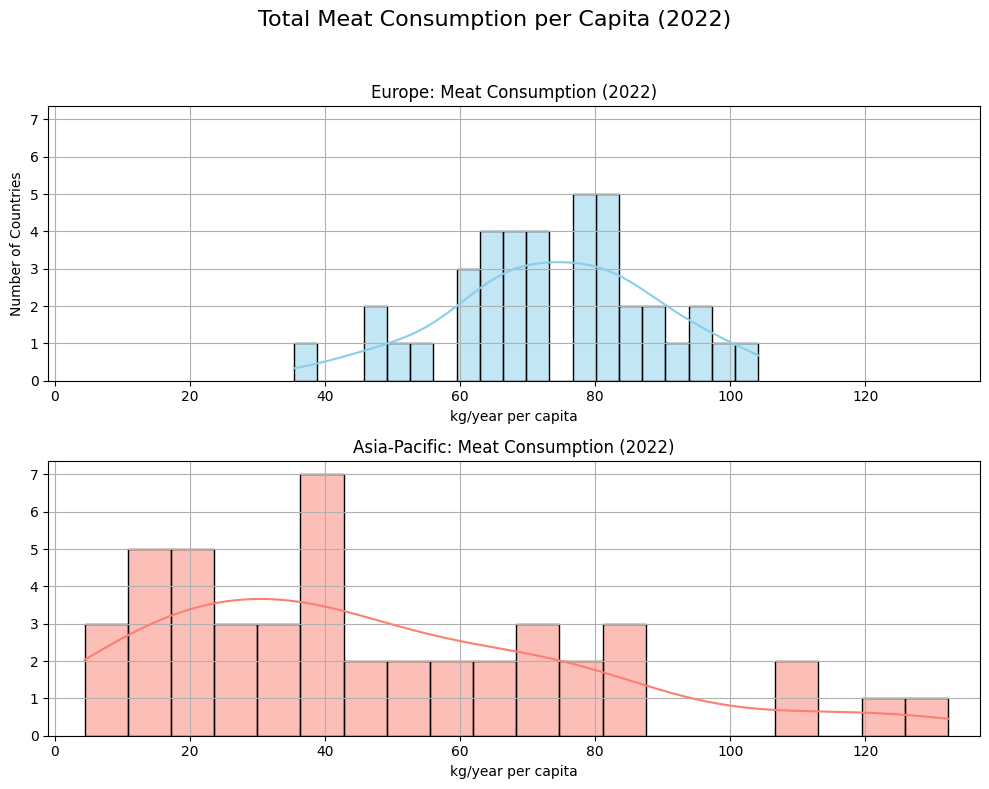

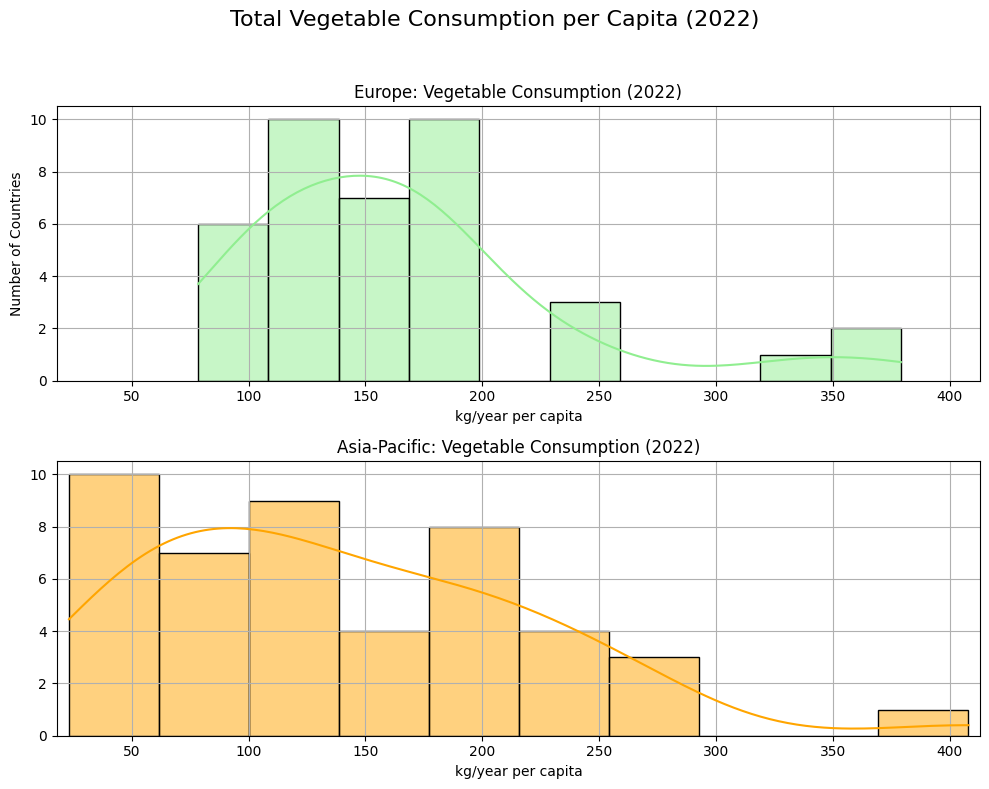

In [18]:
#This is the refactored code for Tuns eda, it uses merged_meat_fruit_veg.csv

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# LOAAAAAAAAAADDDDDDDDDDDDDDDDD
merged_df = pd.read_csv("datasets/merged_meat_fruit_veg.csv")

# Filter data for twozerotwotwo
print(merged_df)
merged_2022 = merged_df[merged_df['Year'] == 2022]

# seperate data by region
europe_data = merged_2022[merged_2022['region'] == 'Europe']
asia_data = merged_2022[merged_2022['region'] == 'Asia']

#  Meat Consumption Histogram  #
# Get combined min and max for x-axis
min_x_meat = min(europe_data['Total_Meat_kg_per_capita'].min(), asia_data['Total_Meat_kg_per_capita'].min())
max_x_meat = max(europe_data['Total_Meat_kg_per_capita'].max(), asia_data['Total_Meat_kg_per_capita'].max())
xlim_meat = (int(min_x_meat) - 5, int(max_x_meat) + 5)

# Set up subplots
fig, axs = plt.subplots(2, 1, figsize=(10, 8), sharey=True)

# Europe histogram
sns.histplot(europe_data['Total_Meat_kg_per_capita'], color='skyblue', kde=True, bins=20, ax=axs[0])
axs[0].set_title('Europe: Meat Consumption (2022)')
axs[0].set_xlabel('kg/year per capita')
axs[0].set_ylabel('Number of Countries')
axs[0].set_xlim(xlim_meat)
axs[0].grid(True)

# Asia-Pacific histogram
sns.histplot(asia_data['Total_Meat_kg_per_capita'], color='salmon', kde=True, bins=20, ax=axs[1])
axs[1].set_title('Asia-Pacific: Meat Consumption (2022)')
axs[1].set_xlabel('kg/year per capita')
axs[1].set_ylabel('')
axs[1].set_xlim(xlim_meat)
axs[1].grid(True)

fig.suptitle('Total Meat Consumption per Capita (2022)', fontsize=16)
plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()

# Vegetable Consumption Histogram  #
# Get combined min and max for x-axis
min_x_veg = min(europe_data['Vegetables_kg_per_capita'].min(), asia_data['Vegetables_kg_per_capita'].min())
max_x_veg = max(europe_data['Vegetables_kg_per_capita'].max(), asia_data['Vegetables_kg_per_capita'].max())
xlim_veg = (int(min_x_veg) - 5, int(max_x_veg) + 5)

# Set up side-by-side plots
fig, axs = plt.subplots(2, 1, figsize=(10, 8), sharey=True)

# Europe histogram
sns.histplot(europe_data['Vegetables_kg_per_capita'], color='lightgreen', kde=True, bins=10, ax=axs[0])
axs[0].set_title('Europe: Vegetable Consumption (2022)')
axs[0].set_xlabel('kg/year per capita')
axs[0].set_ylabel('Number of Countries')
axs[0].set_xlim(xlim_veg)
axs[0].grid(True)

# Asia-Pacific histogram
sns.histplot(asia_data['Vegetables_kg_per_capita'], color='orange', kde=True, bins=10, ax=axs[1])
axs[1].set_title('Asia-Pacific: Vegetable Consumption (2022)')
axs[1].set_xlabel('kg/year per capita')
axs[1].set_ylabel('')
axs[1].set_xlim(xlim_veg)
axs[1].grid(True)


fig.suptitle('Total Vegetable Consumption per Capita (2022)', fontsize=16)
plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()

Mean meat consumption per capita in Europe is : 73.8 kg/capita/year
Mean meat consumption per capita in Asia is : 47.52 kg/capita/year
Difference of mean meat consumption between EU and Asia is : 26.28
95% of differences of means sampled lie between -12.37 and 12.39
One-sided p-value (EU > Asia): 0.0000
Two-sided p-value:             0.0000


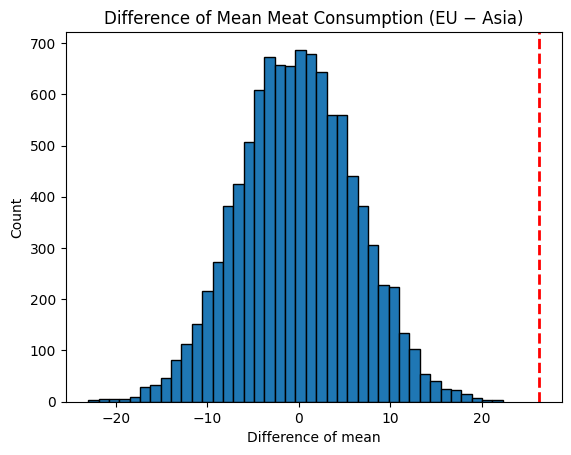

In [19]:
# Let's do hypothesis testing to see if European countries really do eat more meat!
# The way this will work is that for each country there is a meat consumed per capita value.

# Function to find diff of means as this will be important
def diff_of_means(data1, data2) :
    return np.mean(data1) - np.mean(data2)

eu_meat = europe_data['Total_Meat_kg_per_capita']
ap_meat = asia_data['Total_Meat_kg_per_capita']

# We first find the mean meat consumption for the EU and AP.
# Then, we find the observed difference in means.
eu_mean_meat = np.mean(eu_meat)
ap_mean_meat = np.mean(ap_meat)
print(f"Mean meat consumption per capita in Europe is : {np.round(eu_mean_meat, 2)} kg/capita/year")
print(f"Mean meat consumption per capita in Asia is : {np.round(ap_mean_meat, 2)} kg/capita/year")
obsvd_diff_of_means = diff_of_means(eu_meat, ap_meat)
print(f"Difference of mean meat consumption between EU and Asia is : {abs(np.round(obsvd_diff_of_means, 2))}")

# ------------------------------------- x ------------------------------------ #

# Now, let's do some bootstrap resampling.
# Concatenate the two arrays of EU meat consumption and AP meat consumption.
# Initialise an array to store the differences in means
concat_meat = np.concatenate((eu_meat, ap_meat))
meandiffs = []
samples = 10000

# Repeat the following 10k times:
# Shuffle the new array, then label the first X as "EU" and the rest as "AP"
# Find means for each, and find the difference.
# Append the difference to the diff of means array
for i in range(samples) :
    np.random.shuffle(concat_meat)
    shuffle_EU = concat_meat[:len(eu_meat)]
    shuffle_AP = concat_meat[len(eu_meat):]
    
    shuffle_diff_of_means = diff_of_means(shuffle_EU, shuffle_AP)
    meandiffs.append(shuffle_diff_of_means)

# Now, we should have 10k diff's of means
# Find 95% CI for the diff of means
conf_int_means = np.percentile(meandiffs, (2.5, 97.5))
print(f"95% of differences of means sampled lie between {conf_int_means[0]:.2f} and {conf_int_means[1]:.2f}")
# Draw histogram of diff of means, and show the observed as a vertical line

# ------------------------------------- x ------------------------------------ #

# p-values
# One-sided (EU > Asia): proportion of null diffs >= observed
p_val_one_sided = np.mean(meandiffs >= obsvd_diff_of_means)
# Two-sided: extremeness by absolute value
p_val_two_sided = np.mean(np.abs(meandiffs) >= abs(obsvd_diff_of_means))

print(f"One-sided p-value (EU > Asia): {p_val_one_sided:.4f}")
print(f"Two-sided p-value:             {p_val_two_sided:.4f}")

# ------------------------------------- x ------------------------------------ #

# Plot null distribution with observed diff
plt.figure()
plt.hist(meandiffs, bins=40, edgecolor='black')
plt.axvline(obsvd_diff_of_means, linestyle='--', linewidth=2, color='red')
plt.title("Difference of Mean Meat Consumption (EU − Asia)")
plt.xlabel("Difference of mean")
plt.ylabel("Count")
plt.show()


# Question X Analysis
---
As can be seen, the observed difference in means between the mean meat consumption and Europe and that of Asia is far outside of the 95% confidence interval, with a p-value of 0.0001 or less. This shows that there is a definite difference between the distribution of meat consumption per capita in Europe and Asia, and that this is not a product of random chance. 

In [20]:


# Helper function to generate a bootstrap sample
# This should take an array-like data and take a bootstrap sample,
# then take some sort of statistical measurment from it

def bootstrap_replicate_1d(data, func) :
    bs_sample = np.random.choice(data, len(data))
    return func(bs_sample)

# ------------------------------------- x ------------------------------------ #

# Helper function to draw samples amount of bootstrap mean replicates from the data
# Should take the data and the number of samples to take
# Function is mentioned here as the mean

def draw_bootstrap_means(data, samples = 1) :
    means = np.zeros(samples)
    
    for i in range(samples) :
        means[i] = bootstrap_replicate_1d(data, np.mean)
        
    return means